In [1]:
# --- Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# --- Settings
sns.set_theme(style='whitegrid')
np.random.seed(42)

In [2]:
# loading a numpy-array containing the topological data
z = np.load('topographical_data.npy')[4650:4900, 800:1050]

# --- Generating dataset
n = 250 # the square root of the number of datapoints
x, y = np.linspace(0,n,n), np.linspace(0, n, n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

z = z.ravel()

X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

### Contour Plots

Making contour plots for best parameters up to polynomial degree 5 for OLS, Ridge and Lasso

In [19]:
pipeline_OLS = make_pipeline(
            PolynomialFeatures(degree=5),
            StandardScaler(),
            LinearRegression()
)

pipeline_Ridge = make_pipeline(
            PolynomialFeatures(degree=5),
            StandardScaler(),
            Ridge(alpha=0.0001)
)

pipeline_Lasso = make_pipeline(
            PolynomialFeatures(degree=5),
            StandardScaler(),
            Lasso(alpha=0.0001)
)

pipeline_OLS.fit(X_train, z_train)
pipeline_Ridge.fit(X_train, z_train)
pipeline_Lasso.fit(X_train, z_train)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_orig_plot = z.reshape((n,n))
z_values = np.zeros((3,n,n))

for idx, model in enumerate([pipeline_OLS, pipeline_Ridge, pipeline_Lasso]):
    z_total = model.predict(X)

    z_plot = z_total.reshape((n,n))

    z_values[idx] = z_plot

c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.214e+07, tolerance: 6.344e+04
  model = cd_fast.enet_coordinate_descent(


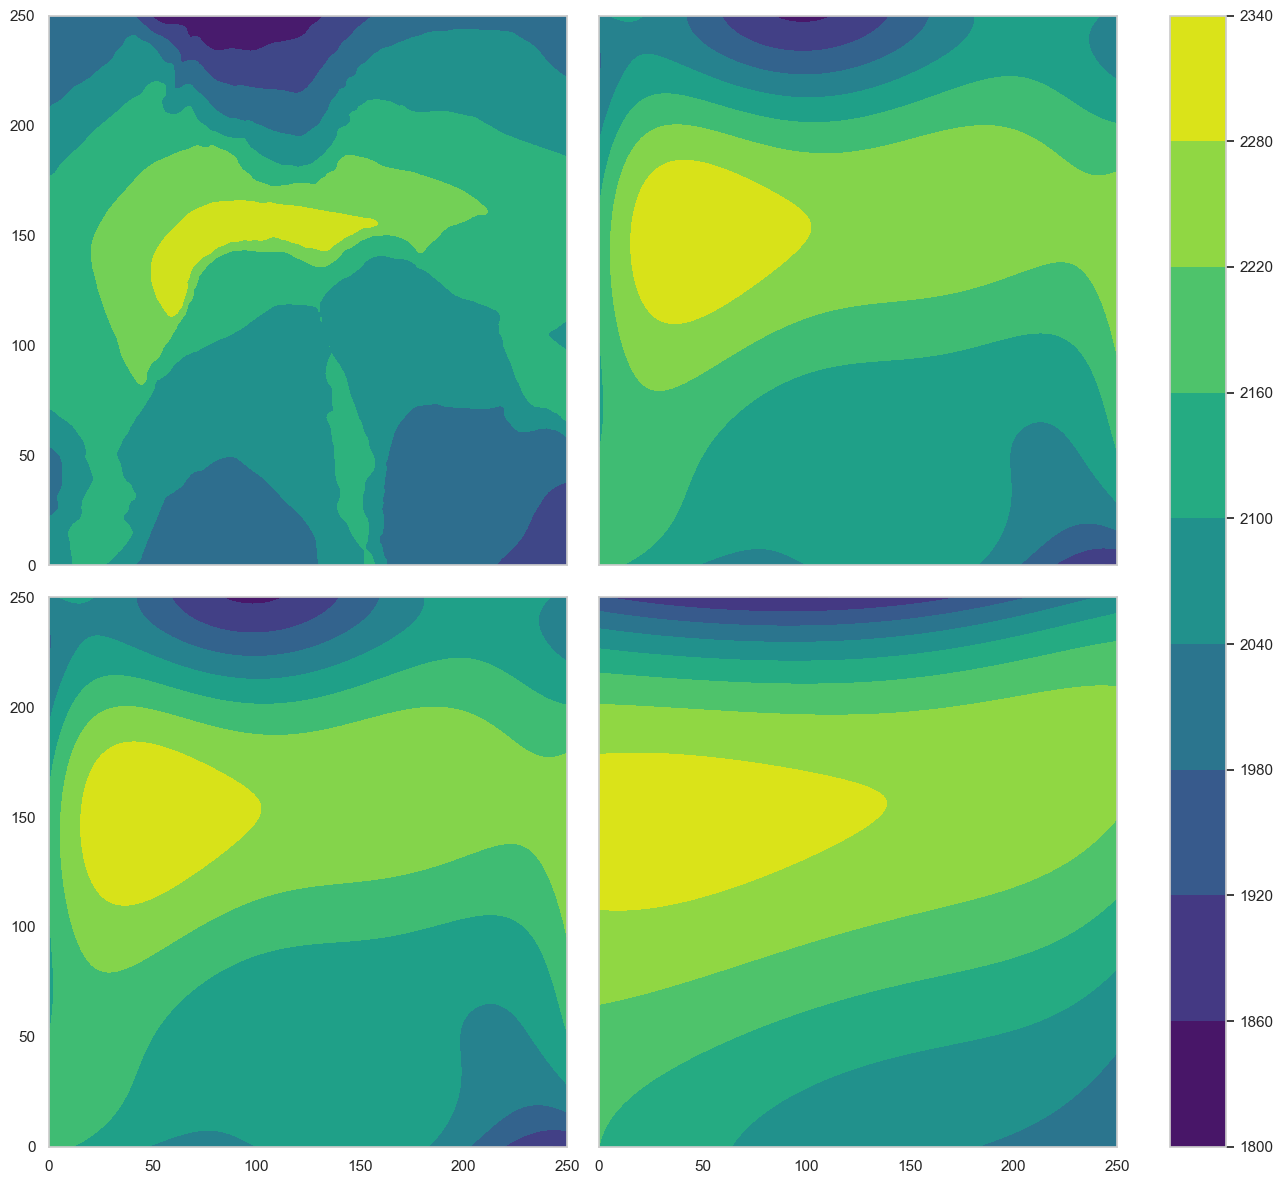

In [20]:
fig, axs = plt.subplots(2,2, figsize=(14, 12), sharex=True, sharey=True); fig.tight_layout()
axs = axs.flatten()

for i in range(4):
    if i == 0:
        cont = axs[i].contourf(x_plot, y_plot, z_orig_plot, cmap='viridis')
    else: 
        cont = axs[i].contourf(x_plot, y_plot, z_values[i-1], cmap='viridis')

cbar = fig.colorbar(cont, ax=axs, orientation='vertical', pad=0.04)
plt.show()

### Higher Degree Fit

The same as above but for the optimal parameters for OLS and Ridge up to degree 30.

c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+05, tolerance: 6.344e+04
  model = cd_fast.enet_coordinate_descent(


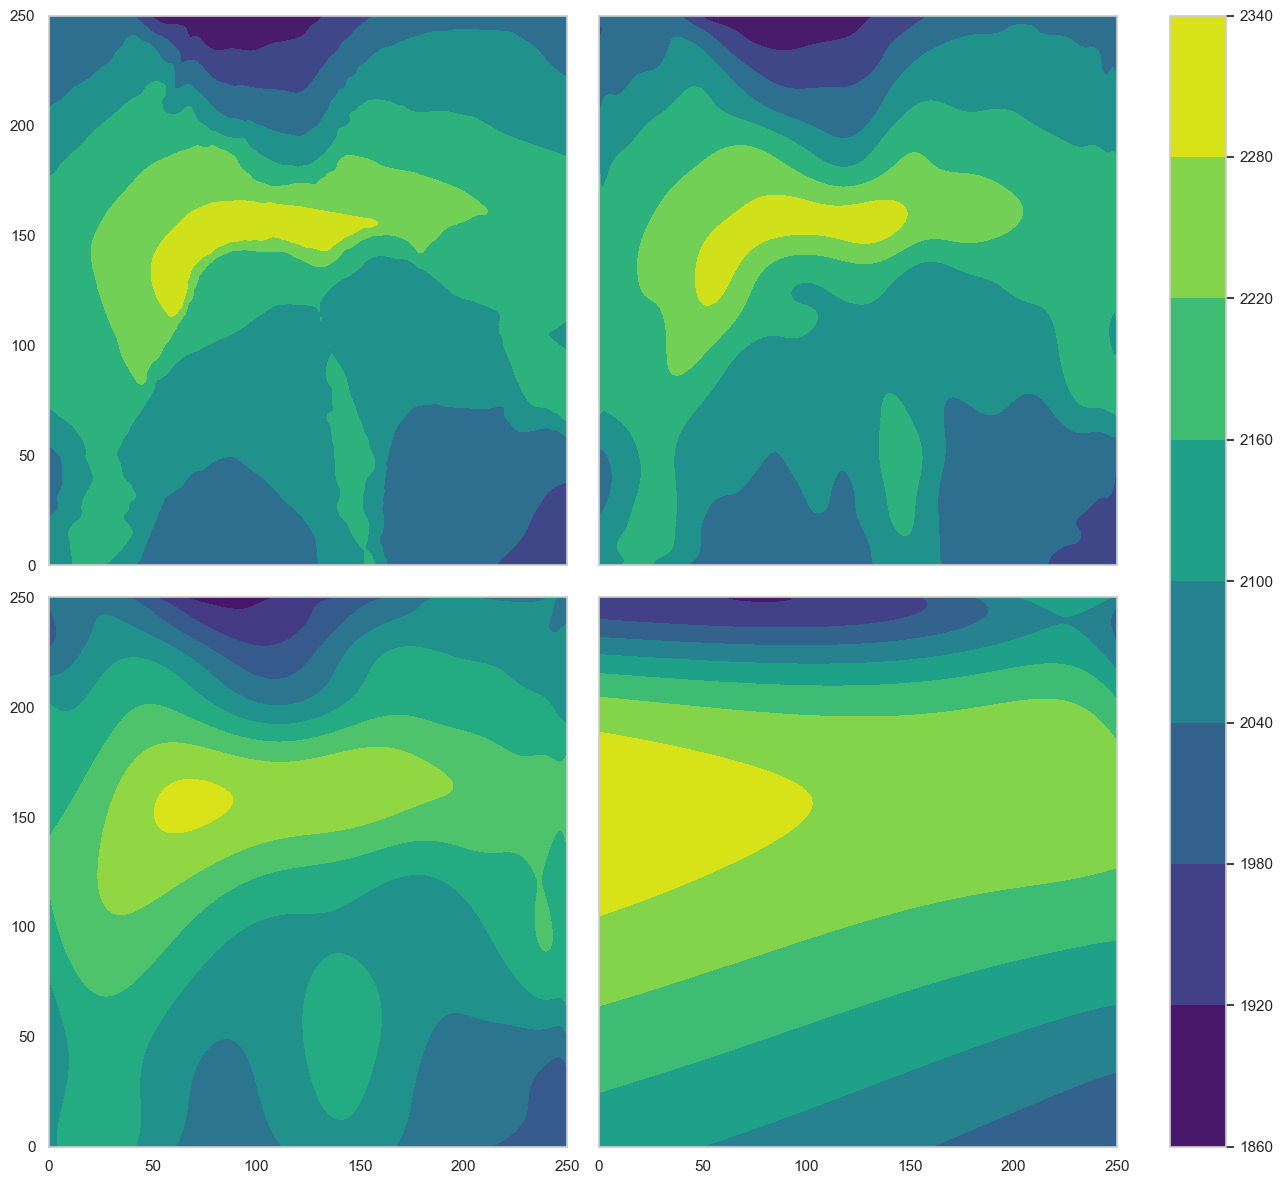

In [3]:

pipeline_OLS = make_pipeline(
            PolynomialFeatures(degree=29),
            StandardScaler(),
            LinearRegression()
)

pipeline_Ridge1 = make_pipeline(
            PolynomialFeatures(degree=30),
            StandardScaler(),
            Ridge(alpha=0.0001)
)

pipeline_Ridge2 = make_pipeline(
            PolynomialFeatures(degree=30),
            StandardScaler(),
            Lasso(alpha=1)
)

pipeline_OLS.fit(X_train, z_train)
pipeline_Ridge1.fit(X_train, z_train)
pipeline_Ridge2.fit(X_train, z_train)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_orig_plot = z.reshape((n,n))
z_values = np.zeros((3,n,n))

for idx, model in enumerate([pipeline_OLS, pipeline_Ridge1, pipeline_Ridge2]):
    z_total = model.predict(X)

    z_plot = z_total.reshape((n,n))

    z_values[idx] = z_plot

# Plotting beta coefficients
fig, axs = plt.subplots(2,2, figsize=(14, 12), sharex=True, sharey=True); fig.tight_layout()
axs = axs.flatten()

for i in range(4):
    if i == 0:
        cont = axs[i].contourf(x_plot, y_plot, z_orig_plot, cmap='viridis')
    else: 
        cont = axs[i].contourf(x_plot, y_plot, z_values[i-1], cmap='viridis')

cbar = fig.colorbar(cont, ax=axs, orientation='vertical', pad=0.04)
plt.show()

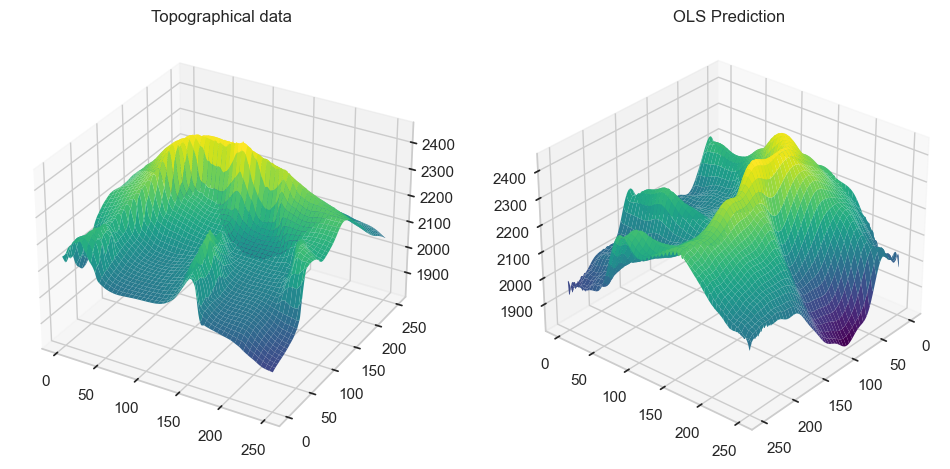

In [23]:
z_total = pipeline_OLS.predict(X)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))

z_orig_plot = z.reshape((n,n))

fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Topographical data')
#ax.view_init(azim=240)

# Plot the polynomial regression prediction (ideally a plane)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('OLS Prediction')
ax.view_init(azim=40)

plt.show()